<a href="https://colab.research.google.com/github/ZaqueMendes/Linguagem_Python/blob/main/Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos



**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

# 1. Importando bibliotecas

In [3]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 33.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-rc4q3w88
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-rc4q3w88
     |████████████████████████████████| 52 kB 554 kB/s 
     |████████████████████████████████| 1.6 MB 12.8 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=84871e5afad040a84d592dae404363d3de865243fdd5d5765eb25575e1f3aacf
  Stored in directory: /tmp/pip-ephem-wheel-cache-gdaqnt1f/wheels/03/00/1c/647b2b1a87981bb9ce79040685d203386303338628a36992f3
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=ff38ab4c7229052c478747c595db6a2d944fb88cdd206c748129778507b4c33b
  Stored in directory: /root/.cache/pip/wheels/0d/68/bb/926065fb744e7d7cb67334cb1a9c696722abc8303e5dc9a8d0
Successfully built pyfolio empyrical


In [2]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# 2. Obtendo e tratando os dados

In [5]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [6]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-12-06,17.966053,6.250587,7.520386,24.746418,8.541739,73268.000000
2017-12-07,17.974728,6.179827,7.426912,24.455774,8.258806,72487.000000
2017-12-08,18.234980,6.203413,7.358931,24.552652,8.291038,72732.000000
2017-12-11,18.347752,6.232899,7.596861,24.746418,8.283877,72800.000000
2017-12-12,18.651381,6.297764,7.545878,25.037066,8.398480,73814.000000
...,...,...,...,...,...,...
2022-11-30,15.920000,8.856470,7.820000,85.709999,39.000000,112486.000000
2022-12-01,16.080000,8.730000,7.470000,86.180000,38.310001,110926.000000
2022-12-02,16.330000,8.770000,7.510000,86.800003,38.660000,112056.000000


In [7]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-12-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-07,0.000483,-0.011321,-0.012429,-0.011745,-0.033124,-0.010659
2017-12-08,0.014479,0.003817,-0.009153,0.003961,0.003903,0.003380
2017-12-11,0.006184,0.004753,0.032332,0.007892,-0.000864,0.000935
2017-12-12,0.016549,0.010407,-0.006711,0.011745,0.013834,0.013929
...,...,...,...,...,...,...
2022-11-30,0.010152,0.010239,0.012953,0.015040,0.034208,0.014210
2022-12-01,0.010050,-0.014280,-0.044757,0.005484,-0.017692,-0.013868
2022-12-02,0.015547,0.004582,0.005355,0.007194,0.009136,0.010187


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-12-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-12-07,1.000483,0.988679,0.987571,0.988255,0.966876,0.989341
2017-12-08,1.014969,0.992453,0.978531,0.992170,0.970650,0.992684
2017-12-11,1.021246,0.997170,1.010169,1.000000,0.969812,0.993612
2017-12-12,1.038146,1.007548,1.003390,1.011745,0.983228,1.007452
...,...,...,...,...,...,...
2022-11-30,0.886116,1.416902,1.039840,3.463532,4.565815,1.535268
2022-12-01,0.895021,1.396669,0.993300,3.482524,4.485036,1.513976
2022-12-02,0.908936,1.403068,0.998619,3.507578,4.526011,1.529399


In [9]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2017-12-06,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2017-12-07,10004.828340,9886.794241,9875.705962,9882.551207,9668.764993,49318.644743,-0.013627
2017-12-08,10149.685977,9924.528731,9785.310009,9921.699520,9706.498917,49487.723155,0.003428
2017-12-11,10212.455462,9971.701421,10101.691087,10000.000000,9698.116329,49983.964299,0.010028
2017-12-12,10381.456923,10075.475084,10033.897452,10117.450334,9832.284617,50440.564409,0.009135
...,...,...,...,...,...,...,...
2022-11-30,8861.156131,14169.020368,10398.403007,34635.315336,45658.152557,113722.047399,0.021459
2022-12-01,8950.212891,13966.686481,9933.000841,34825.242307,44850.356081,112525.498601,-0.010522
2022-12-02,9089.364211,14030.681931,9986.190185,35075.784727,45260.106946,113442.128001,0.008146


In [26]:

df_clone=carteira[:]

df_final=df_clone[['ABEV3.SA']]
df_final



,ABEV3.SA
Date,
2017-12-06,10000.000000
2017-12-07,10004.828340
2017-12-08,10149.685977
2017-12-11,10212.455462
2017-12-12,10381.456923
...,...
2022-11-30,8861.156131
2022-12-01,8950.212891
2022-12-02,9089.364211


,ABEV3.SA
Date,
2017-12-06,2.000000e+06
2017-12-07,2.000966e+06
2017-12-08,2.029937e+06
2017-12-11,2.042491e+06
2017-12-12,2.076291e+06
...,...
2022-11-30,1.772231e+06
2022-12-01,1.790043e+06
2022-12-02,1.817873e+06


# 3. Resultados

Start date,2017-12-06
End date,2022-12-06
Total months,59
,Backtest
Annual return,17.957%
Cumulative returns,125.381%
Annual volatility,28.279%
Sharpe ratio,0.73
Calmar ratio,0.47
Stability,0.74
Max drawdown,-38.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.20,2020-02-19,2020-03-18,2020-07-17,108
1,32.65,2021-07-28,2022-07-14,NaT,NaN
2,21.52,2018-02-26,2018-06-21,2019-07-04,354
3,13.17,2019-07-10,2019-08-26,2019-11-07,87
4,12.48,2021-01-08,2021-03-24,2021-04-28,79


Stress Events,mean,min,max
New Normal,0.08%,-14.03%,11.14%


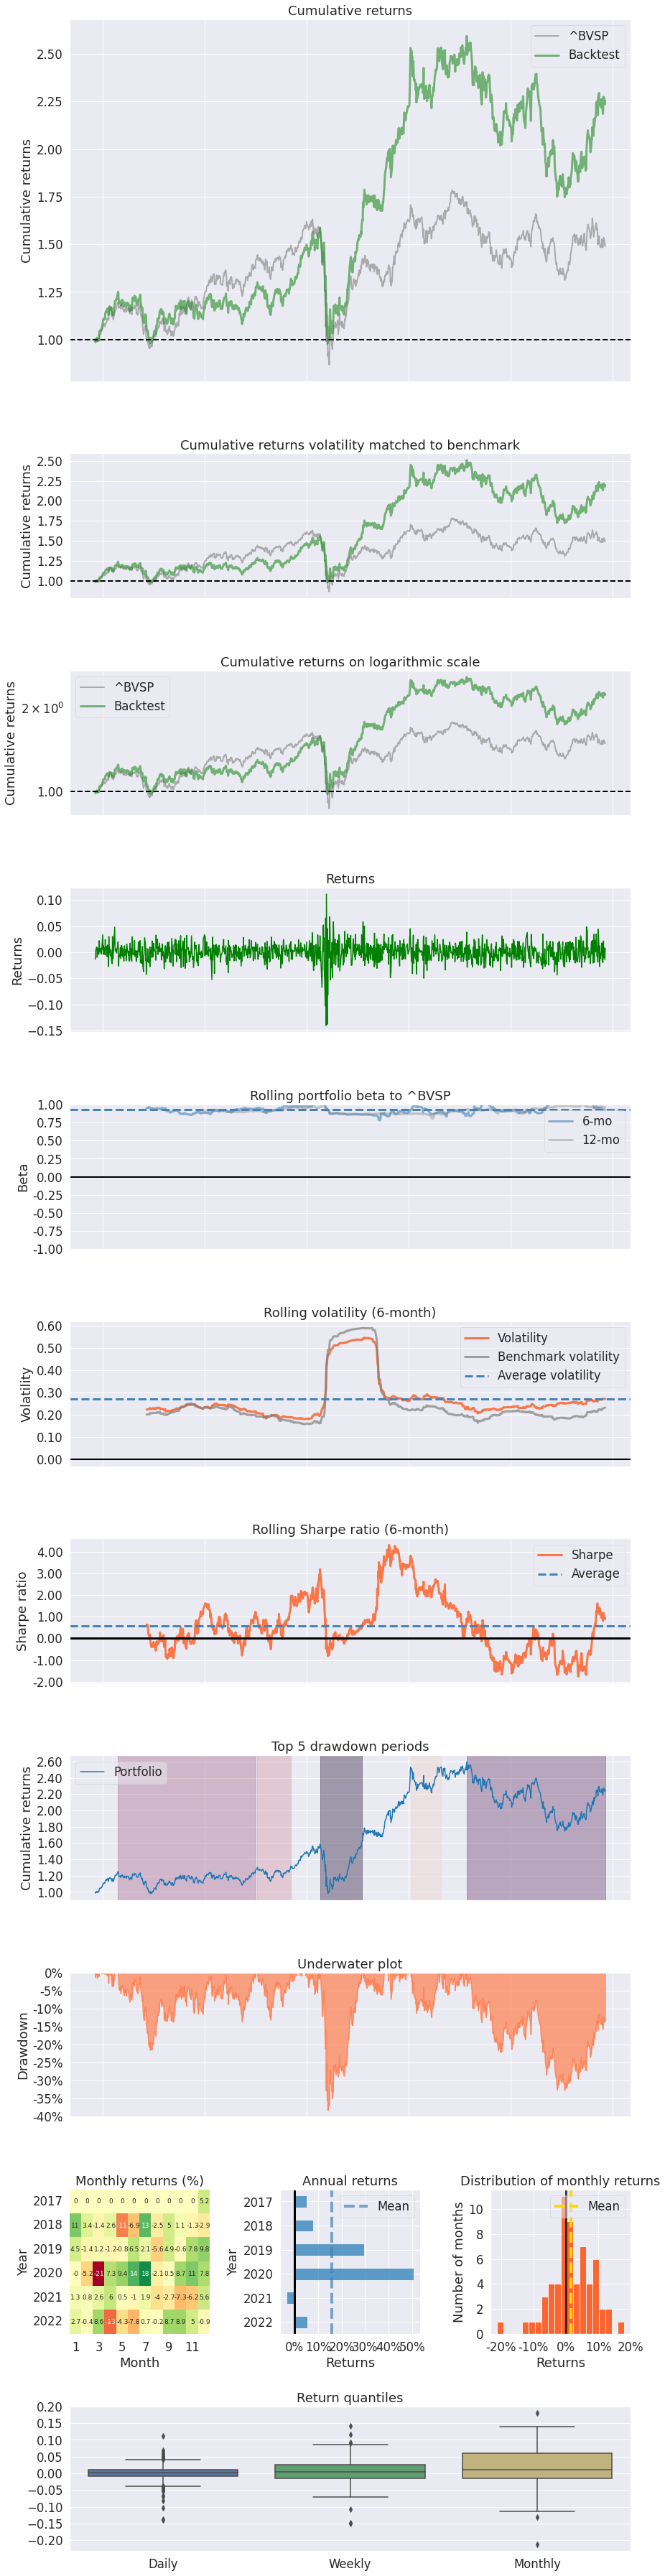

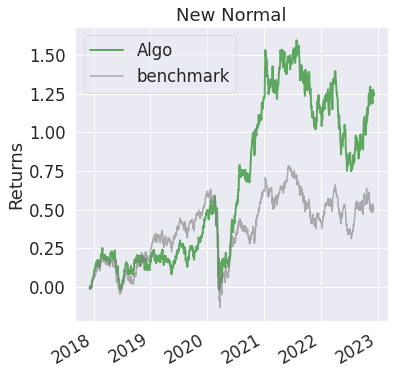

In [10]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


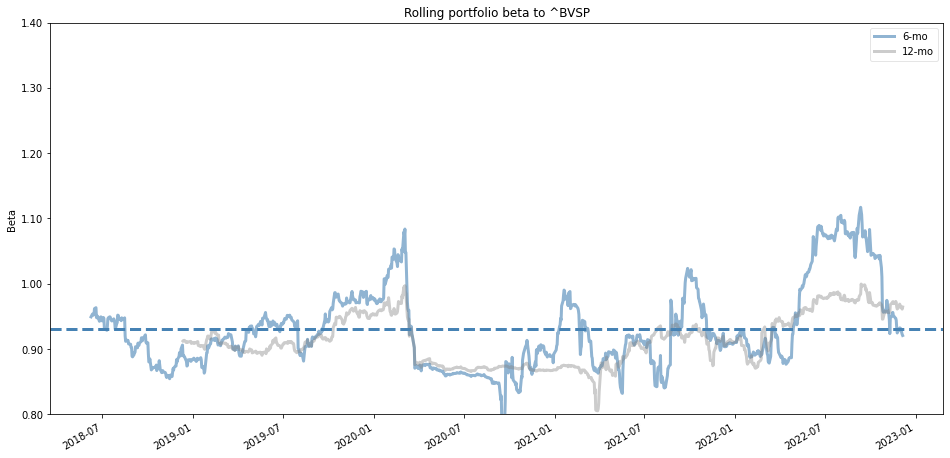

In [11]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));